In [7]:
# Standard libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib.gridspec import GridSpec
pd.set_option('display.max_columns', 100)
import plotly.offline as py
import plotly.express as px
import plotly.graph_objs as go
import json
import requests
import folium
from folium.plugins import FastMarkerCluster, Fullscreen, MiniMap, HeatMap, HeatMapWithTime, LocateControl


# Objectives
---
In this kernel I am covering 2 subjects with data of the ecommerce marketplace, LoMo.

1. Best performing product category
2. Marketing Channel Effectiveness

### Monthly Revenues by Product category
_\* Revenue is calculated by summing up price_

In [20]:
#load the data
data = pd.read_csv("C:/Users/ccher/OneDrive/Desktop/PwC Assn/final_data.csv",parse_dates=['order_purchase_timestamp'])
data.drop("Unnamed: 0",axis=1,inplace=True)

In [21]:
data['order_purchase_timestamp(y-m)'] = data['order_purchase_timestamp'].dt.to_period('M')


In [23]:
cols = data.groupby(by='product_category_name') \
           .price \
           .sum() \
           .sort_values(ascending=False) \
           .index

monthly_segment_revenue = data.groupby(['order_purchase_timestamp(y-m)', 'product_category_name']) \
                              .price \
                              .sum() \
                              .unstack(level=1, fill_value=0)

monthly_segment_revenue = monthly_segment_revenue[cols]
monthly_segment_revenue

product_category_name,health_beauty,watches_gifts,bed_bath_table,sports_leisure,computers_accessories,furniture_decor,housewares,cool_stuff,auto,garden_tools,toys,baby,perfumery,telephony,office_furniture,computers,stationery,pet_shop,musical_instruments,small_appliances,electronics,fashion_bags_accessories,consoles_games,luggage_accessories,construction_tools_construction,home_appliances_2,home_construction,agro_industry_and_commerce,home_appliances,furniture_living_room,home_comfort,fixed_telephony,air_conditioning,audio,small_appliances_home_oven_and_coffee,kitchen_dining_laundry_garden_furniture,books_general_interest,construction_tools_lights,construction_tools_safety,industry_commerce_and_business,food,market_place,construction_tools_garden,fashion_shoes,arts,drinks,signaling_and_security,furniture_bedroom,books_technical,food_drink,construction_tools_tools,fashion_male_clothing,fashion_underwear_beach,christmas_supplies,tablets_printing_image,theater_photo,music,dvds_blue_ray,furniture_mattress_and_upholstery,party_supplies,books_imported,kitchen_laptops_and_food_preparators,fashion_female_clothing,cuisine,fashion_sport,arts_and_craftmanship,diapers_and_hygiene,pc_gamer,flowers,home_comfort_2,cds_dvds_musicals,fashion_children_clothes,security_and_services
order_purchase_timestamp(y-m),,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-03,0.00,29.90,0.00,58.39,0.00,194.80,0.00,0.00,0.00,0.00,128.90,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,29.99,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00
2016-04,741.10,0.00,159.80,698.89,71.00,1623.19,289.70,178.90,9.90,179.90,708.59,279.79,1164.30,19.99,86.99,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1932.47,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,199.00,749.69,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00
2016-05,241.64,0.00,169.90,649.00,143.88,387.71,0.00,0.00,354.89,0.00,1239.58,329.99,619.60,109.70,86.99,0.00,0.00,0.00,0.00,0.00,0.00,0.00,629.90,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,149.99,599.60,0.00,0.00,0.00,0.00,0.00,0.00,89.90,0.00,467.40,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,24.90,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,54.90,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00
2016-06,370.67,1282.17,59.90,153.70,20.90,278.78,399.80,206.80,499.99,139.99,240.88,199.80,1219.30,29.90,0.00,0.00,0.00,209.80,0.00,0.00,107.99,163.70,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,79.99,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,225.90,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00
2016-07,467.66,0.00,0.00,138.00,180.45,635.13,329.70,660.40,101.49,590.00,808.77,227.70,857.40,18.90,129.97,0.00,0.00,759.96,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,269.90,0.00,132.00,0.00,0.00,0.00,0.00,0.00,89.90,0.00,58.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00
2016-08,1019.69,1399.00,0.00,71.49,318.69,1690.06,189.89,0.00,0.00,69.99,0.00,333.89,999.60,0.00,689.99,0.00,0.00,0.00,0.00,0.00,0.00,49.90,949.99,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,179.80,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,134.90,0.00,0.00,0.00,0.0,0.00,0.00
2016-09,255.89,0.00,89.39,102.80,70.00,659.87,44.99,0.00,0.00,380.00,649.98,0.00,11.90,0.00,129.97,0.00,0.00,0.00,0.00,0.00,0.00,79.90,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.

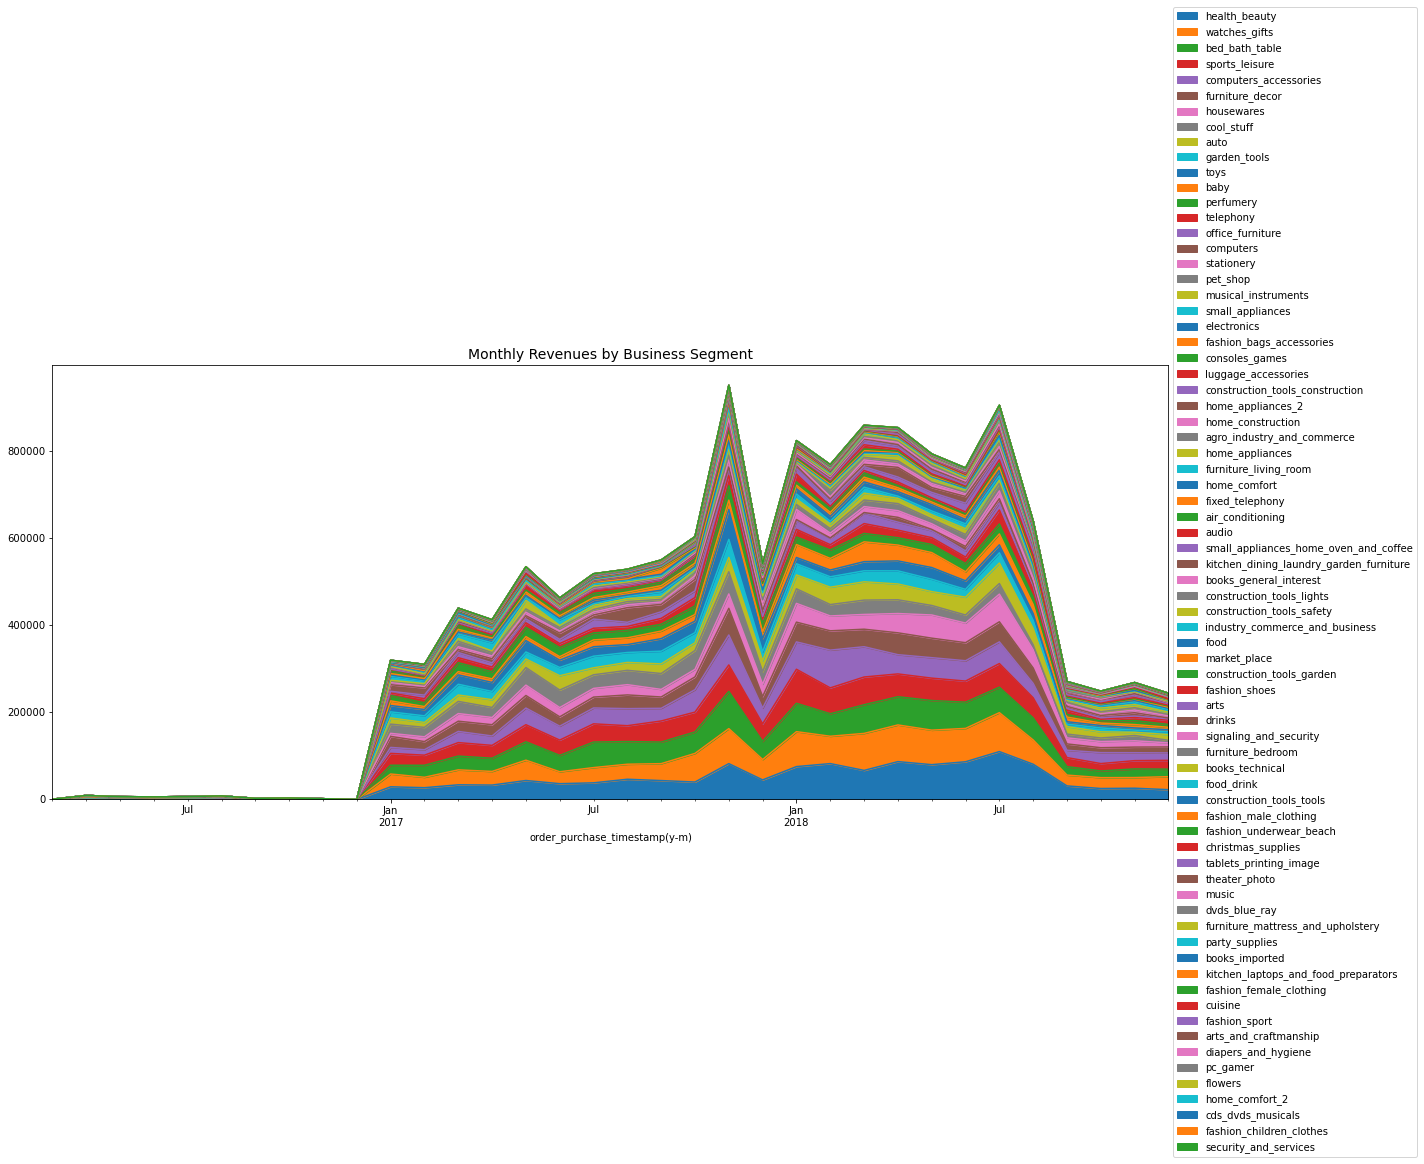

In [24]:
# Plot the monthly revenues by segment
monthly_segment_revenue.plot.area(figsize=(20,8))

plt.title('Monthly Revenues by Business Segment', fontsize=14)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5));

- biggest revenue was 'health_beauty' 
- let's dive into health_beauty segment to see what we can learn

In [26]:
health_beauty = data[data.product_category_name == 'health_beauty']
health_beauty.shape

(9772, 68)

In [28]:
# Create monthly revenues by product category
cols = health_beauty.groupby('product_category_name') \
              .price \
              .sum() \
              .sort_values(ascending=False) \
              .index

monthly_revenue_category = health_beauty.groupby(['order_purchase_timestamp(y-m)', 'product_category_name']) \
                                  .price \
                                  .sum() \
                                  .unstack(level=1, fill_value=0)

monthly_revenue_category = monthly_revenue_category[cols]
monthly_revenue_category

product_category_name,health_beauty
order_purchase_timestamp(y-m),
2016-04,741.10
2016-05,241.64
2016-06,370.67
2016-07,467.66
2016-08,1019.69
2016-09,255.89
2016-10,462.40
2017-01,28958.85
2017-02,26915.67


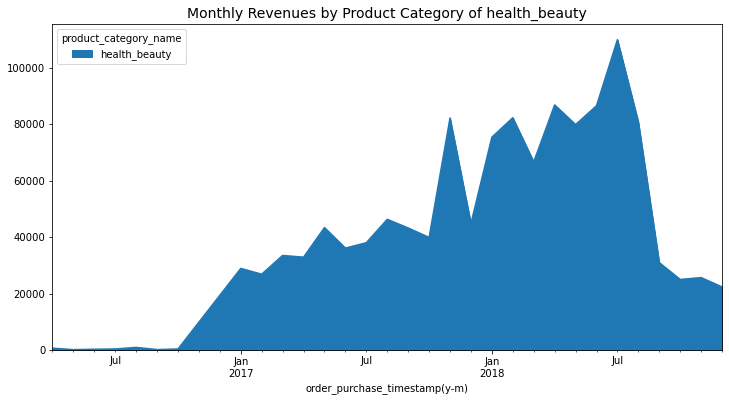

In [33]:
# Plot the monthly revenues by category
monthly_revenue_category.plot.area(figsize=(12,6))
plt.title('Monthly Revenues by Product Category of health_beauty', fontsize=14);

- health_beauty revenue soared to over 80k at the end of 2017.This could be seasonal for festive period  
- it reaches its peak of more than 100k in july of 2018

## 1. Marketing Channel Effectiveness
---
LoMo acquired sellers through diverse marketing channels. Let's find out which channel was the most effective in lead generation. Below the term 'Marketing Qualified Lead(MQL)' means a potential reseller/manufacturer who has an interest in selling their products on LoMo. 

## Time Series Volume of Marketing Qualified Lead (MQL)

In [13]:
# Load 'MQL' dataset
mql = pd.read_csv("C:/Users/ccher/OneDrive/Desktop/PwC Assn/010_lomo_marketing_qualified_leads_dataset.csv",
                  parse_dates=['first_contact_date'])

print(mql.shape)
mql.head(3)

(8000, 4)


,mql_id,first_contact_date,landing_page_id,origin
0,dac32acd4db4c29c230538b72f8dd87d,2018-01-02,88740e65d5d6b056e0cda098e1ea6313,social
1,8c18d1de7f67e60dbd64e3c07d7e9d5d,2017-10-20,007f9098284a86ee80ddeb25d53e0af8,paid_search
2,b4bc852d233dfefc5131f593b538befa,2018-03-22,a7982125ff7aa3b2054c6e44f9d28522,organic_search


In [14]:
# Add a 'year-month' column
mql['first_contact_date(y-m)'] = mql['first_contact_date'].dt.to_period('M')

print(mql.shape)
mql[['first_contact_date', 'first_contact_date(y-m)']].head(3)

(8000, 5)


,first_contact_date,first_contact_date(y-m)
0,2018-01-02,2018-01
1,2017-10-20,2017-10
2,2018-03-22,2018-03


In [15]:
# Create time series table
monthly_mql = mql.groupby(by='first_contact_date(y-m)').mql_id \
                                                       .count()
monthly_mql.to_frame().T

first_contact_date(y-m),2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12
mql_id,76,39,49,59,52,80,227,281,249,352,345,193,849,868,932,965,991,196,222,222,205,186,153,209


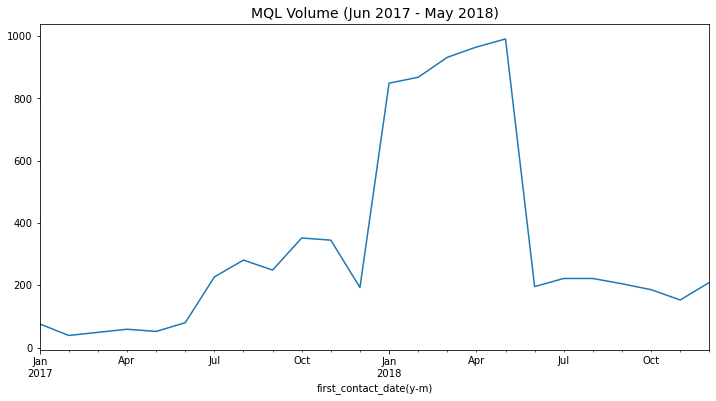

In [16]:
# Plot the monthly MQL volume
monthly_mql.plot.line(figsize=(12, 6))
plt.title('MQL Volume (Jun 2017 - May 2018)', fontsize=14);

Since 2018, monthly MQL volume soared to above 800. Let's take a look at the volume for each acquisition channel.

## MQL volume by marketing channel
marketing channel is recorded in 'origin' field

In [17]:
# Create 'channel-time series' table
mql_origin = pd.pivot_table(mql,
                            index='origin',
                            columns='first_contact_date(y-m)',
                            values='mql_id',                            
                            aggfunc='count',
                            fill_value=0)

# Sort index from largest to smallest in volume
origin_list = mql.groupby('origin').mql_id \
                                   .count() \
                                   .sort_values(ascending=False) \
                                   .index

mql_origin = mql_origin.reindex(origin_list)
mql_origin


first_contact_date(y-m),2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12
origin,,,,,,,,,,,,,,,,,,,,,,,,
organic_search,27,17,10,14,12,19,53,94,59,106,93,56,290,249,249,259,292,58,51,73,59,51,47,58
paid_search,17,4,13,12,10,19,51,58,54,75,55,36,128,174,223,198,208,27,49,39,35,40,25,36
social,7,5,7,9,9,5,23,49,39,48,61,37,135,121,129,233,165,37,55,31,42,27,32,44
unknown,11,6,6,11,5,15,40,38,37,49,54,26,106,146,150,114,136,29,29,26,29,28,28,40
direct_traffic,2,4,4,2,3,5,15,14,19,20,20,11,61,62,52,51,50,14,10,20,15,24,12,9
email,6,1,3,6,2,6,15,12,19,29,34,13,60,57,65,36,56,24,7,17,12,5,3,5
referral,3,1,3,1,4,5,9,12,10,6,12,7,31,31,31,37,50,3,9,3,5,2,2,7
other,0,0,1,1,3,4,3,2,6,6,8,2,23,13,16,18,12,2,3,9,3,5,3,7
display,1,1,0,2,3,1,16,2,4,4,4,5,9,13,12,12,11,2,6,3,1,4,0,2


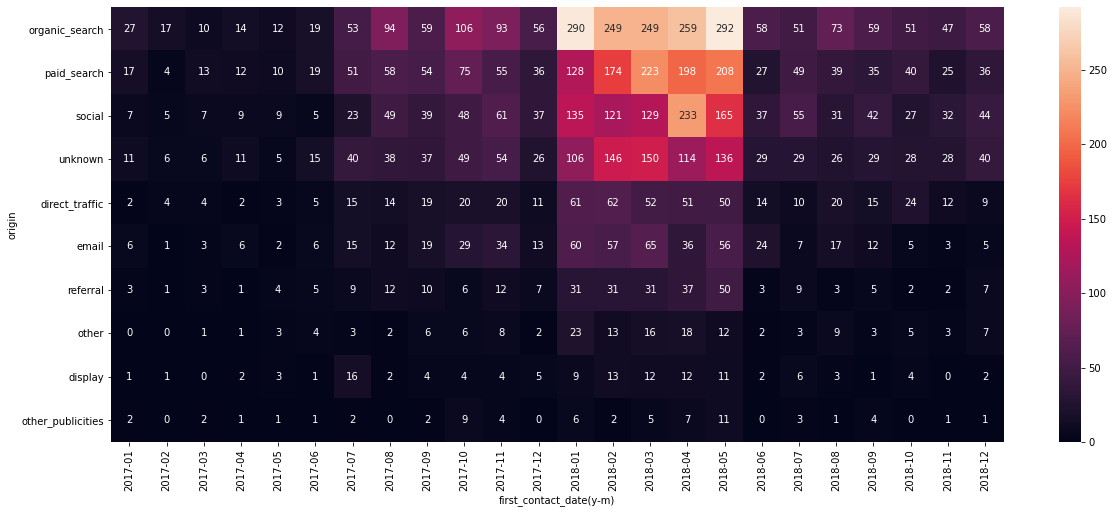

In [18]:
# Plot the monthly volume by channel
plt.figure(figsize=(20,8))
sns.heatmap(mql_origin, annot=True, fmt='g');

- Paid search is the second biggest contributor to lead generation after 'organic search'.
- The third one is 'social' which acquired MQLs more than or similar to 'paid search' since April 2018.
- If the marginal cost of paid search increases, it would be possible to examine effectiveness of 'social' as an alternative.